<a href="https://colab.research.google.com/github/allie-touchstone/Optimization/blob/main/Optimization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimzation Project 1
## Group Members: Shehzad Ali, Samuel Oh, Ben Sullivan, and Allie Touchstone 

First step is to bring in imports

In [ ]:
%pip install -i https://pypi.gurobi.com gurobipy
import numpy as np
import gurobipy as gp
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.gurobi.com


The csv files are read in directly below.

In [ ]:
from google.colab import files
uploaded = files.upload()
roi = pd.read_csv('ROI_data.csv')
df_monthly = pd.read_csv('roi_mat.csv')

**1.)** Assume that your company is deciding how to spend a marketing budget of $10M.  You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums.  Your department has employed an outside consulting firm to estimate the return on investment (ROI) of each marketing medium under consideration.  The results are in the table below, and also in a CSV attached to this assignment:


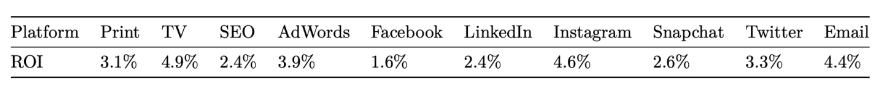

On top of these ROIs, your boss has decided to constrain your budget as follows:

**a.** The amount invested in print and TV should be no more than the amount spent on Facebook and Email. Surprisingly, email seems to be a great channel for reaching real people. Shown in A[1]

**b.** The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords. Shown in A[2]

**c.** For each platform, the amount invested should be no more than $3M. Shown in A[3:13]

Formulate the marketing budget allocation problem as a linear program.  Use gurobi to find the optimal budget allocation.

The objective variable is the ROI which is read in through the csv in the code block below.


In [ ]:
names = list(roi.columns)
obj = np.array(roi.iloc[0][1:]) # First firm ROIs is our objective measure
A = np.zeros((13,10))
A[0,] = [1]*10 # Total budget constraint
A[1,] = [-1,-1,0,0,1,0,0,0,0,1] #Print/TV and Facebook/Email constraint
A[2,] = [0,0,-2,-2,1,1,1,1,1,0] #Social media and AdWords/SEO constraint
A[3:13,] = np.diag(np.ones(10)) # Individual platform budget constraint
b = np.array([10,0,0,3,3,3,3,3,3,3,3,3,3]) 
sense = np.array(['<','>','>','<','<','<','<','<','<','<','<','<','<'])

In [ ]:
Roi1Mod = gp.Model()
Roi1 = Roi1Mod.addMVar((10)) 
Roi1ModCon = Roi1Mod.addMConstrs(A, Roi1, sense, b) 
Roi1Mod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) 
Roi1Mod.Params.OutputFlag = 0 
Roi1Mod.optimize()
percent = Roi1Mod.objVal
roi1 = Roi1.x.tolist()

Restricted license - for non-production use only - expires 2022-01-13


In [ ]:
print('The company should spend the following on each type of marketing:')
for x in range(0,10):
    print('$',roi1[x],'million on', names[x+1])
print('This budget allocation has a ROI of',round(percent*10,2) ,'% from the original investment of $10 million.')

The company should spend the following on each type of marketing:
$ 0.0 million on Print
$ 3.0 million on TV
$ 0.0 million on SEO
$ 1.0 million on AdWords
$ 0.0 million on Facebook
$ 0.0 million on LinkedIn
$ 3.0 million on Instagram
$ 0.0 million on Snapchat
$ 0.0 million on Twitter
$ 3.0 million on Email
This budget allocation has a ROI of 4.56 % from the original investment of $10 million.


**4.)** Your boss is happy to see the promising results presented by the marketing department. However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis.  The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above).  You are asked to compare the two optimal allocations from these two ROI estimates.  

Below are the updated ROI's:

In [ ]:
obj2 = np.array(roi.iloc[1][1:])
Roi2Mod = gp.Model()
Roi2 = Roi2Mod.addMVar(len(obj2)) 
Roi2ModCon = Roi2Mod.addMConstrs(A, Roi2, sense, b) 
Roi2Mod.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) 
Roi2Mod.Params.OutputFlag = 0 
Roi2Mod.optimize()
percent2 = Roi2Mod.objVal
roi2 = Roi2.x.tolist()

In [ ]:
allo_df = pd.DataFrame([Roi1.x, Roi2.x],index=('ROI','Second Firms ROI Estimate'),columns=names[1:])
allo_df

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
ROI,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0
Second Firms ROI Estimate,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0


In [ ]:
print('The company should spend the following on each type of marketing:')
for x in range(0,10):
    print('$',roi2[x],'million on', names[x+1])
print('This updated budget allocation has a ROI of',round(percent2*10,2) ,'% from the original investment of $10 million.')

The company should spend the following on each type of marketing:
$ 3.0 million on Print
$ 0.0 million on TV
$ 0.0 million on SEO
$ 1.0 million on AdWords
$ 3.0 million on Facebook
$ 3.0 million on LinkedIn
$ 0.0 million on Instagram
$ 0.0 million on Snapchat
$ 0.0 million on Twitter
$ 0.0 million on Email
This updated budget allocation has a ROI of 4.56 % from the original investment of $10 million.


**5.)**  Are the allocations the same?  Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)?  Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective?  Do you think the third constraint above, based on your boss’ experience, is useful?

In [ ]:
firstAlloSecROI = Roi1Mod.objval - sum((Roi1.x*obj2)) # First distribution and second ROI
print("The ROI would go down by $",round(firstAlloSecROI*1000000)," if we used the budget allocation of the first ROI data, but used the ROI rates provided by the second firm", sep='')

The ROI would go down by $192000 if we used the budget allocation of the first ROI data, but used the ROI rates provided by the second firm


In [ ]:
firstRoiSecAllo = Roi2Mod.objval - sum((Roi2.x*obj)) #second distribution and first ROI
print("The ROI would go down by $",round(firstRoiSecAllo*1000000)," if we used the budget allocation of the second ROI data, but used the ROI rates provided by the first firm", sep='')

The ROI would go down by $204000 if we used the budget allocation of the second ROI data, but used the ROI rates provided by the first firm


In [ ]:
obj2 = np.array(roi.iloc[1][1:])
Roi2Mod = gp.Model()
Roi2 = Roi2Mod.addMVar(len(obj2)) 
Roi2ModCon = Roi2Mod.addMConstrs(A, Roi2, sense, b) 
Roi2Mod.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) 
Roi2Mod.Params.OutputFlag = 0 
Roi2Mod.optimize()
percent2 = Roi2Mod.objVal
roi2 = Roi2.x.tolist()

The following matrix is without considering the third constraint.

In [ ]:
A2 = np.zeros((3,10))
A2[0,] = [1]*10 # Budget constraint
A2[1,] = [-1,-1,0,0,1,0,0,0,0,1] 
A2[2,] = [0,0,-2,-2,1,1,1,1,1,0]
b2 = np.array([10,0,0])
sense2 = np.array(['<','>','>'])

Roi3Mod = gp.Model()
Roi3 = Roi3Mod.addMVar(10)
Roi3ModCon = Roi3Mod.addMConstrs(A2, Roi3, sense2, b2)
Roi3Mod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)
Roi3Mod.Params.OutputFlag = 0
Roi3Mod.optimize()
print(Roi3Mod.objVal)
print(Roi3Mod.x)
print("The ROI would go up by $", round((Roi3Mod.objVal-Roi1Mod.objVal)*1000000)," without 3rd constraint.", sep='')

0.465
[0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0]
The ROI would go up by $9000 without 3rd constraint.


**6.)** To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data.  Use the first ROI data as your starting point.  By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [ ]:
ObjLowerBound = Roi1.SAObjLow.tolist()
ObjUpperBound = Roi1.SAObjUp.tolist()

In [ ]:
sensitivity_df = pd.DataFrame()
sensitivity_df["Medium"] = names[1:11]
sensitivity_df["Lower Bound"] = ObjLowerBound
sensitivity_df["Upper Bound"] = ObjUpperBound
sensitivity_df = sensitivity_df.set_index("Medium").T
sensitivity_df

Medium,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Lower Bound,-inf,0.039,-inf,0.033,-inf,-inf,0.039,-inf,-inf,0.029
Upper Bound,0.049,0.062,0.039,0.046,0.029,0.039,inf,0.039,0.039,inf


**7.)** Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be 10 Million + 10 Million  × 4% × 50% = $10.2M.  The monthly ROI for next year is given in roi_mat.csv. The three constraints given by your boss are still in place for each month.  What is the optimal allocation for each month?

In [ ]:
budget = 10
budget_list = []
allocation = []
for i in range(1,13):
    b3 = np.array([budget,0,0,3,3,3,3,3,3,3,3,3,3])
    sense = np.array(['<','>','>','<','<','<','<','<','<','<','<','<','<'])
    ojModel = gp.Model()

    ojModX = ojModel.addMVar(10)
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b3)
    ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

    ojModel.Params.OutputFlag = 0
    ojModel.optimize()
    ojModel.objVal
    allocation.append(ojModX.x)
    ror = (ojModX.x@df_monthly.iloc[i-1,1:]*0.01*0.5)
    budget_list.append(budget)
    budget = budget + ror

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
opt_allocation = pd.DataFrame(allocation, index=months ,columns=names[1:])
opt_allocation['Budget'] = budget_list
opt_allocation = opt_allocation.round(3)
opt_allocation

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Budget
Jan,0.0,3.0,0.0,1.000,0.0,0.0,3.0,0.0,0.000,3.0,10.000
Feb,0.0,3.0,0.0,1.180,0.0,0.0,3.0,0.0,0.000,3.0,10.180
Mar,0.0,3.0,0.0,1.354,0.0,0.0,3.0,0.0,0.000,3.0,10.354
Apr,0.0,3.0,0.0,1.505,0.0,0.0,3.0,0.0,0.011,3.0,10.516
May,0.0,3.0,0.0,1.565,0.0,0.0,3.0,0.0,0.130,3.0,10.695
Jun,0.0,3.0,0.0,1.630,0.0,0.0,3.0,0.0,0.260,3.0,10.889
Jul,0.0,3.0,0.0,1.700,0.0,0.0,3.0,0.0,0.399,3.0,11.099
Aug,0.0,3.0,0.0,1.773,0.0,0.0,3.0,0.0,0.547,3.0,11.320
Sep,0.0,3.0,0.0,1.846,0.0,0.0,3.0,0.0,0.692,3.0,11.537
Oct,0.0,3.0,0.0,1.908,0.0,0.0,3.0,0.0,0.817,3.0,11.725


**8.)** A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model.  Describe how my might model this?

Every medium is stable as the biggest budget increase in one month occurs when the AdWords budget increases by $180,000 in February. The allocation we found is stable. 

EXTRA: Plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

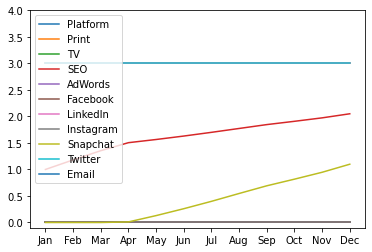

In [ ]:
plot_list = list(roi.columns).copy()
plot_list.pop(0)
plt.plot(opt_allocation)
plt.legend(list(roi.columns),loc='best') 
plt.ylim([-0.1, 4])
plt.show()

In [ ]:
platforms_list = plot_list
platforms = pd.Series.sum(opt_allocation)
#for x in platforms:
if x == 0: platforms_list.pop(x)

platforms_list
platforms

Print          0.000
TV            36.000
SEO            0.000
AdWords       19.484
Facebook       0.000
LinkedIn       0.000
Instagram     36.000
Snapchat       0.000
Twitter        4.902
Email         36.000
Budget       132.384
dtype: float64